**AI-Based Migraine Symptom Classifier for Early Detection and Triage**

## Project Overview
Migraines affect over one billion people globally and present in various subtypes such as *migraine with aura*, *without aura*, and *chronic migraine*. Misclassification or delayed diagnosis often leads to poor treatment outcomes and patient discomfort.

This project, developed as part of **NeuroHealthTech’s AI initiative**, focuses on building a **machine learning model** that classifies migraine types based on patient symptom data. The goal is to assist healthcare professionals in **early detection and triage** through data-driven insights.

## Dataset Description
- **Source:** [Kaggle – Migraine Symptom Dataset for Classification](https://www.kaggle.com/datasets/gzdekzlkaya/migraine-symptom-dataset-for-classification)  
- **Author:** Gözde Kızılkaya  
- **Records:** ~2000 patient entries  
- **Format:** CSV  
- **License:** Open for research and non-commercial use  

Each record represents a patient’s migraine episode, including:
- **Demographics:** Age, Attack Duration, Frequency  
- **Pain Attributes:** Location (Unilateral, Bilateral, Frontal, Temporal), Character (Throbbing, Pressing, etc.), Intensity (1–5)  
- **Symptoms:** Nausea, Vomit, Phonophobia, Photophobia, Visual, Sensory, Motor, Vertigo, Tinnitus, etc.  
- **Target Variable:** Type of migraine  
  - Migraine without aura  
  - Migraine with aura  
  - Chronic migraine  
  - Hemiplegic migraine  
  - Retinal migraine  

## Project Workflow
1. **Data Exploration (EDA):** Analyze symptom patterns and class distribution.  
2. **Data Preprocessing:** Encode categorical variables, handle imbalance, and scale features.  
3. **Model Building:** Train and compare algorithms (Logistic Regression, Random Forest, XGBoost, etc.).  
4. **Evaluation:** Use metrics like accuracy, F1-score, and SHAP explainability.  
5. Streamlit App for real-time migraine type prediction.  

##Tools & Libraries
- **Python**, **Pandas**, **Seaborn**, **Matplotlib**, **Scikit-learn**, **XGBoost**, **LightGBM**, **SHAP**
- **Streamlit** for interactive deployment  

## Objective
To develop an interpretable, data-driven migraine classification system that can enhance clinical triage accuracy and support early diagnosis in digital healthcare settings.


In [ ]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all columns
pd.set_option('display.max_columns', None)

# Load the dataset
file_path = '/content/1749474140333_2bbd2a2699.csv'
df = pd.read_csv(file_path)
df.head(1)

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,Visual,Sensory,Dysphasia,Dysarthria,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF,Type
0,30,1,5,1,1,2,1,0,1,1,1,2,0,0,0,0,0,0,0,0,0,0,0,Typical aura with migraine


In [ ]:
# Basic info
df.info()

# Check missing values
print("\nMissing Values:\n", df.isnull().sum())

# Check for duplicated rows
print("\nDuplicate Rows:", df.duplicated().sum())

# Drop duplicates if any
df = df.drop_duplicates()

# Find duplicate rows
duplicate_rows = df[df.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")
display(duplicate_rows)

# Drop rows only if critical features are missing
critical_cols = ['Age', 'Duration', 'Type']
df = df.dropna(subset=critical_cols)
print("Cleaned shape (after soft dropna):", df.shape)

# Only drop if duplicates exist and keeping one is safe
df = df.drop_duplicates()
print("After removing duplicates:", df.shape)

# Drop duplicates
df_cleaned = df.drop_duplicates()

# Drop constant columns (e.g., 'Ataxia')
df_cleaned = df_cleaned.loc[:, df_cleaned.nunique() > 1]

# Drop rows with missing values
df_cleaned = df_cleaned.dropna()

# Confirm cleaned shape
print("Final cleaned shape:", df_cleaned.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Age          400 non-null    int64 
 1   Duration     400 non-null    int64 
 2   Frequency    400 non-null    int64 
 3   Location     400 non-null    int64 
 4   Character    400 non-null    int64 
 5   Intensity    400 non-null    int64 
 6   Nausea       400 non-null    int64 
 7   Vomit        400 non-null    int64 
 8   Phonophobia  400 non-null    int64 
 9   Photophobia  400 non-null    int64 
 10  Visual       400 non-null    int64 
 11  Sensory      400 non-null    int64 
 12  Dysphasia    400 non-null    int64 
 13  Dysarthria   400 non-null    int64 
 14  Vertigo      400 non-null    int64 
 15  Tinnitus     400 non-null    int64 
 16  Hypoacusis   400 non-null    int64 
 17  Diplopia     400 non-null    int64 
 18  Defect       400 non-null    int64 
 19  Ataxia       400 non-null    

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,Visual,Sensory,Dysphasia,Dysarthria,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF,Type


Cleaned shape (after soft dropna): (394, 24)
After removing duplicates: (394, 24)
Final cleaned shape: (394, 23)


Data Exploration (EDA) • Analyze class distribution of Type • Visualize relationships between symptoms and migraine types • Identify correlations and possible data quality issues


Class distribution:
Type
Typical aura with migraine       241
Migraine without aura             60
Familial hemiplegic migraine      24
Typical aura without migraine     20
Basilar-type aura                 18
Other                             17
Sporadic hemiplegic migraine      14
Name: count, dtype: int64


/tmp/ipython-input-4-3217786647.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x='Type', palette='Set2')


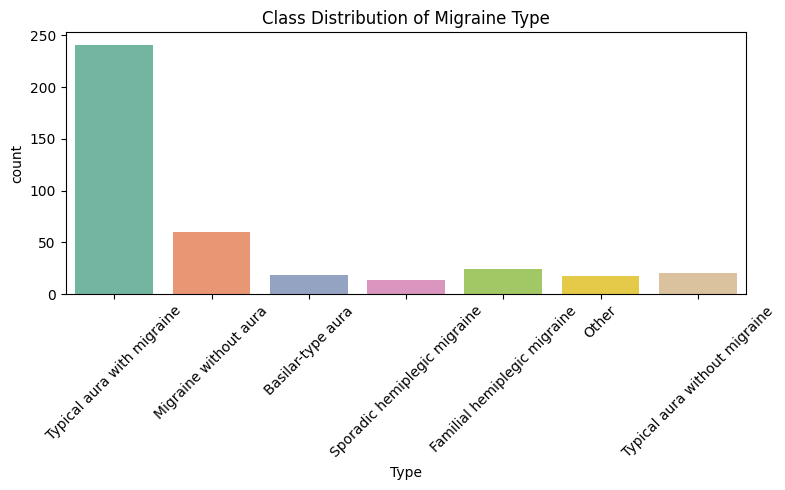

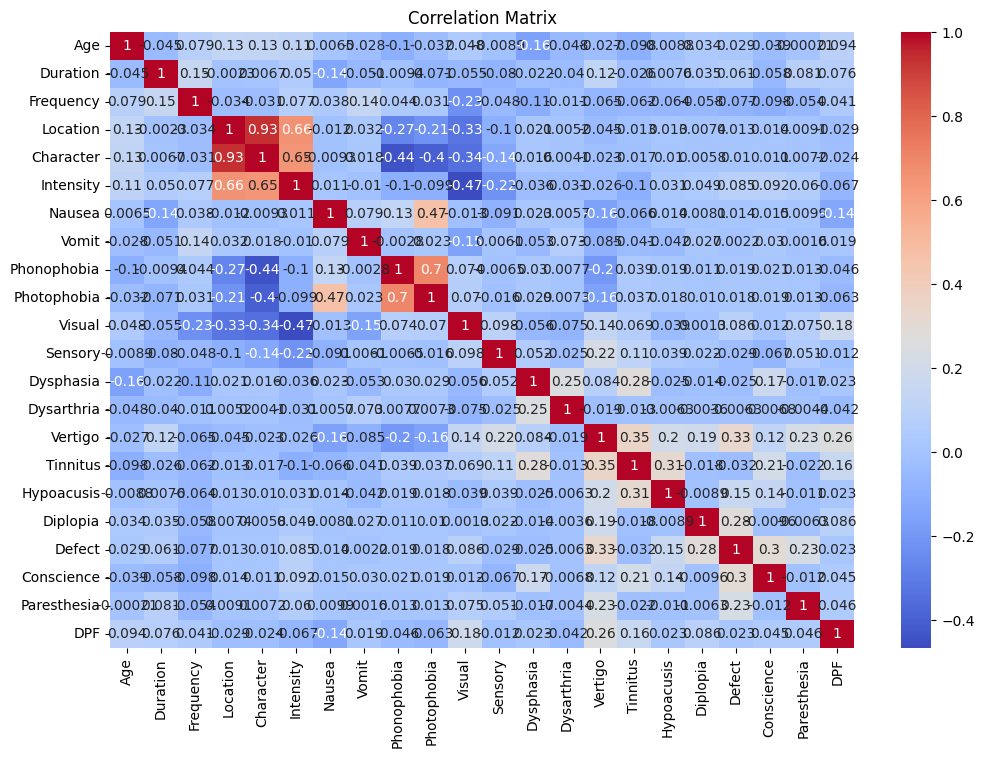

/tmp/ipython-input-4-3217786647.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Type', y=col, data=df_cleaned, palette='Set2')


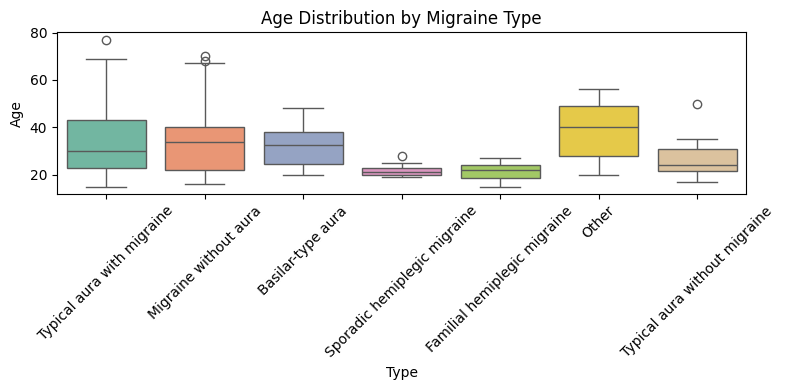

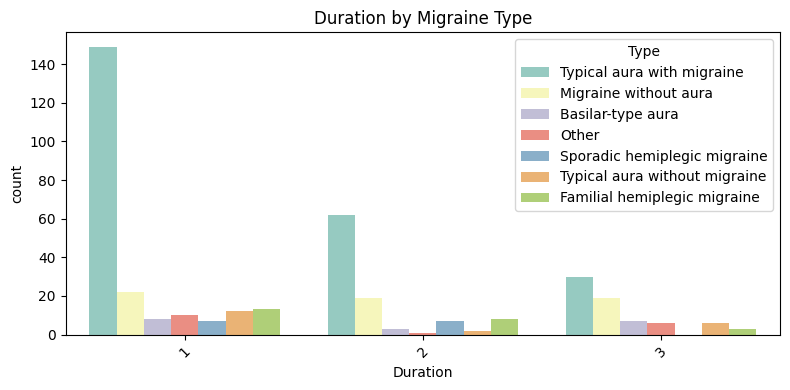

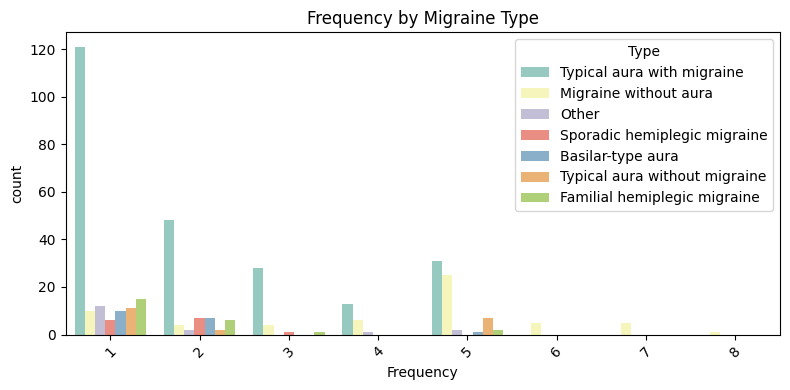

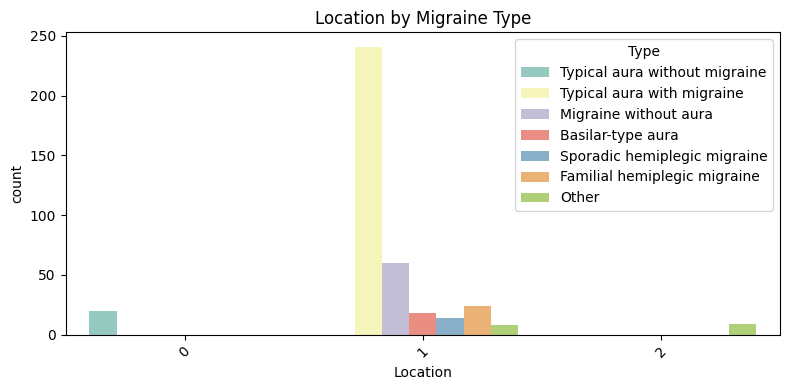

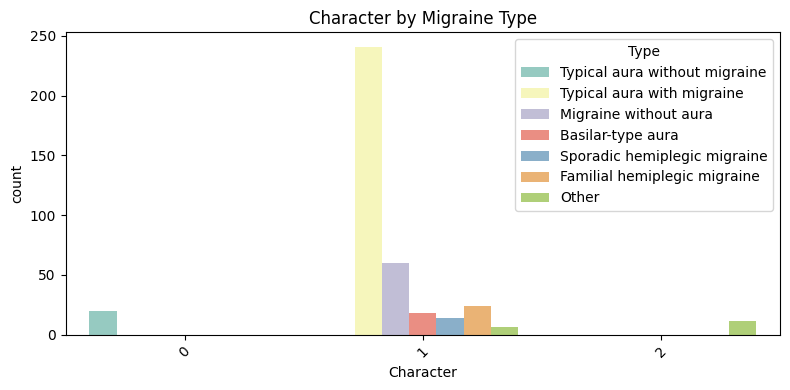

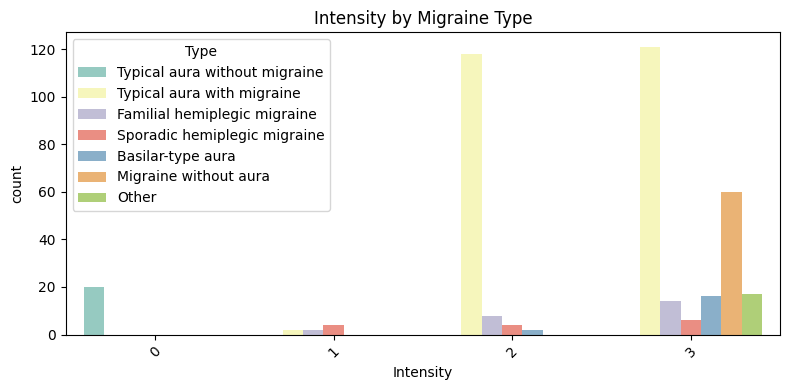

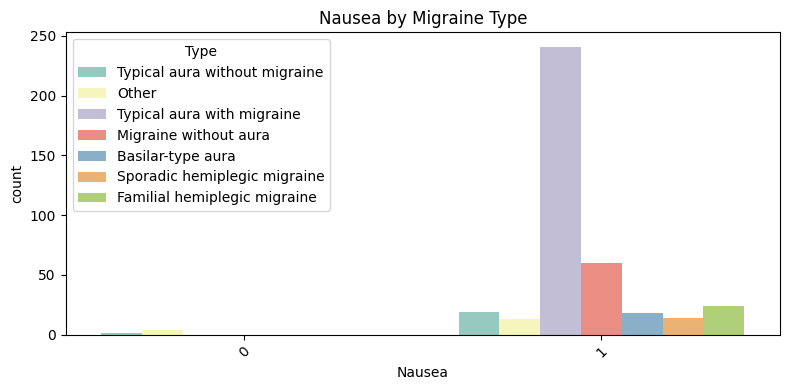

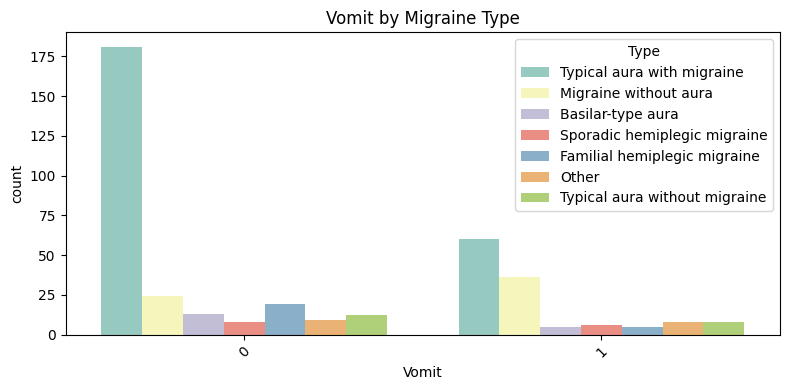

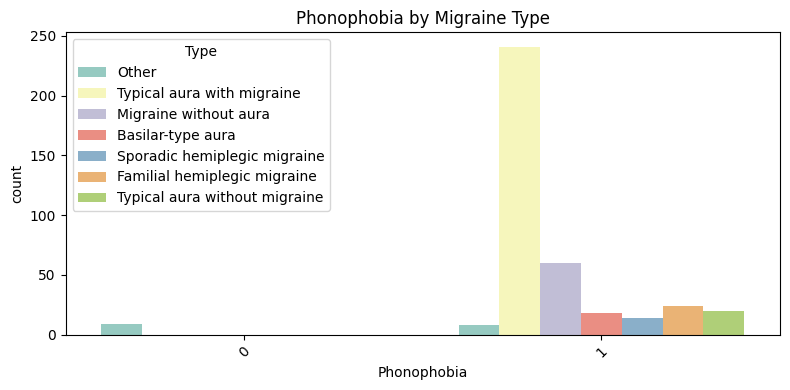

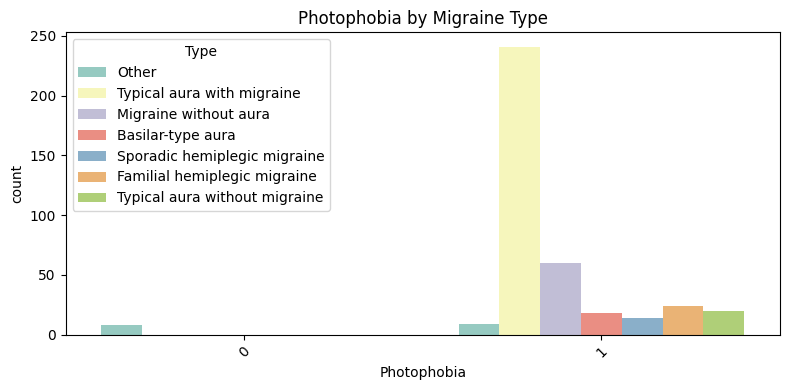

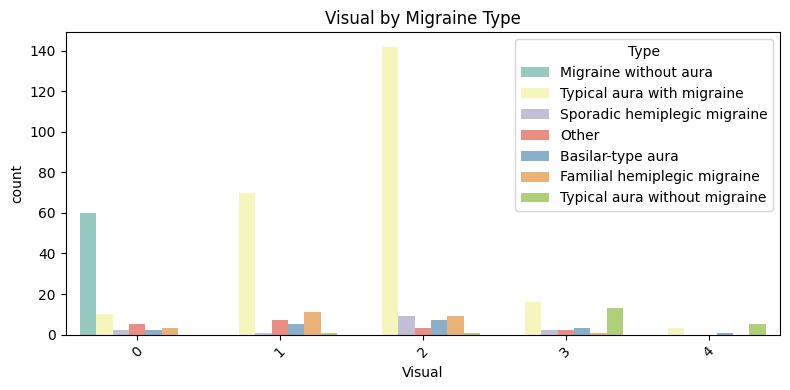

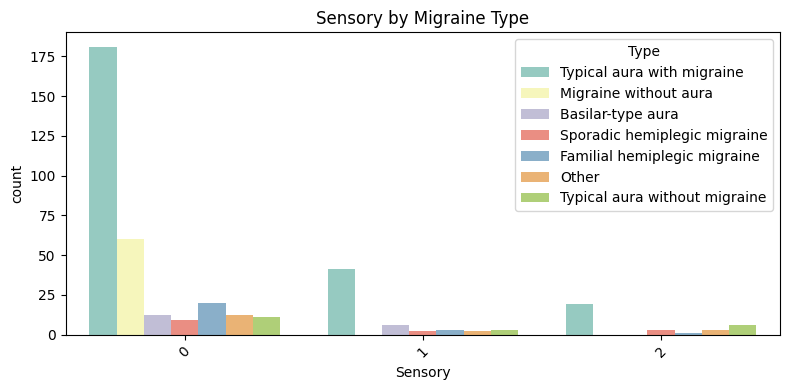

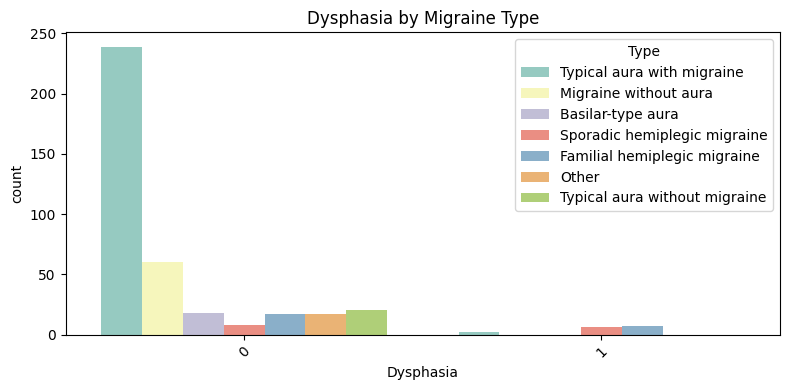

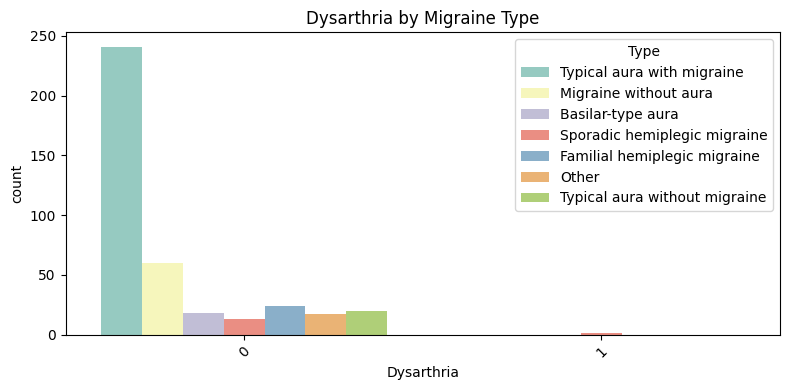

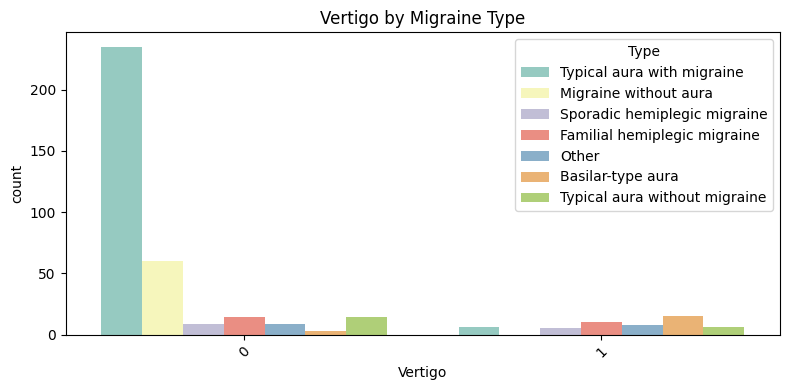

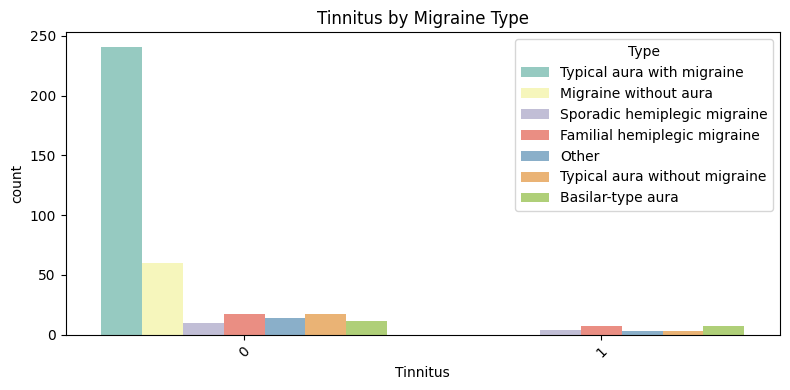

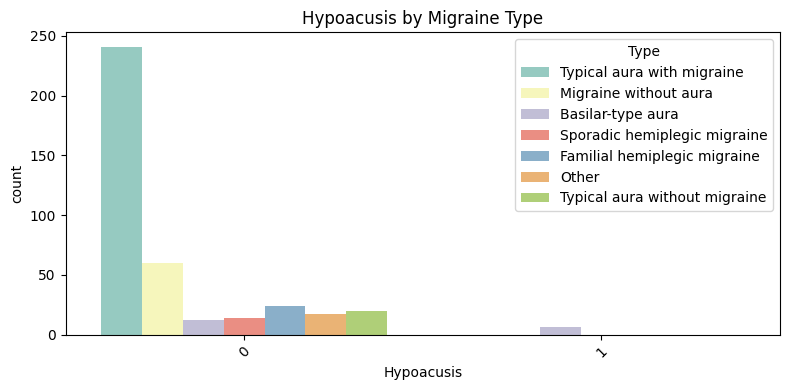

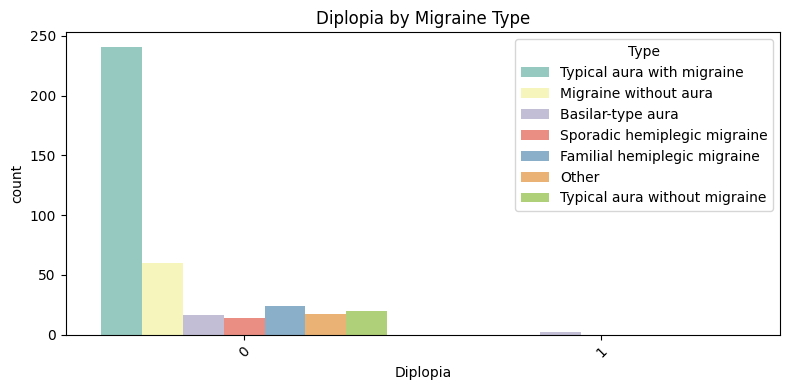

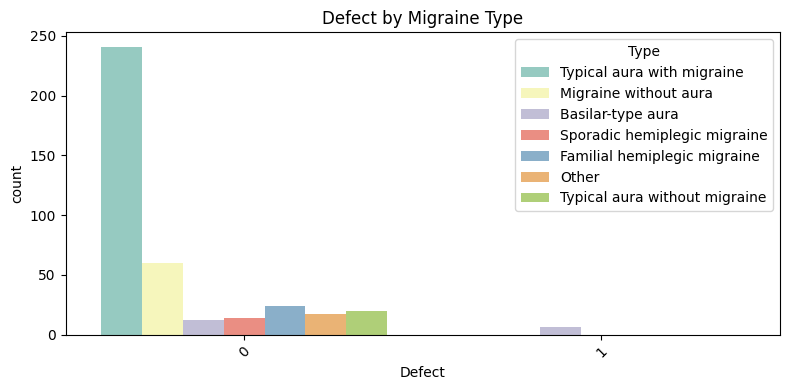

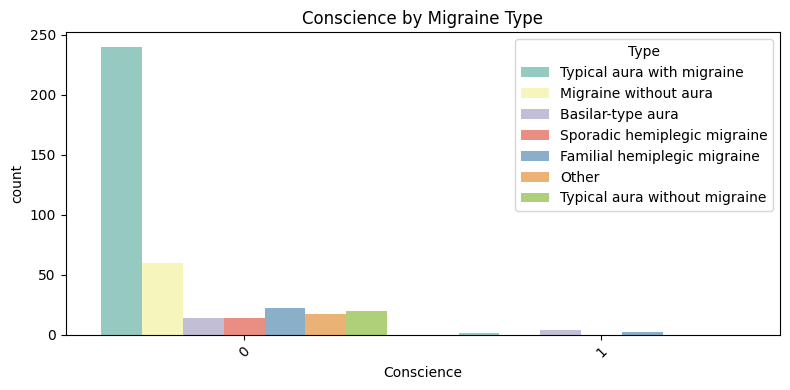

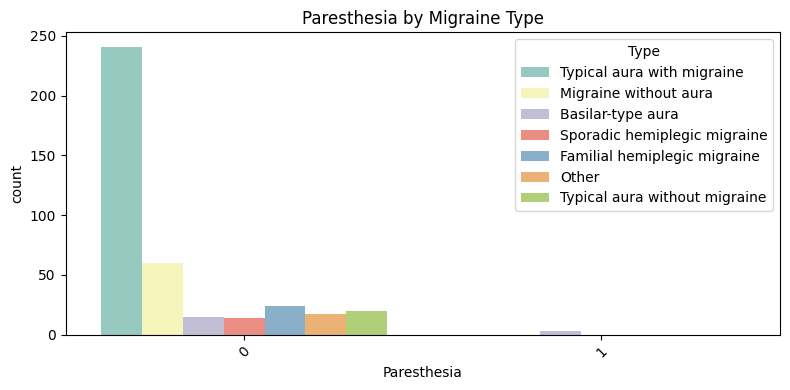

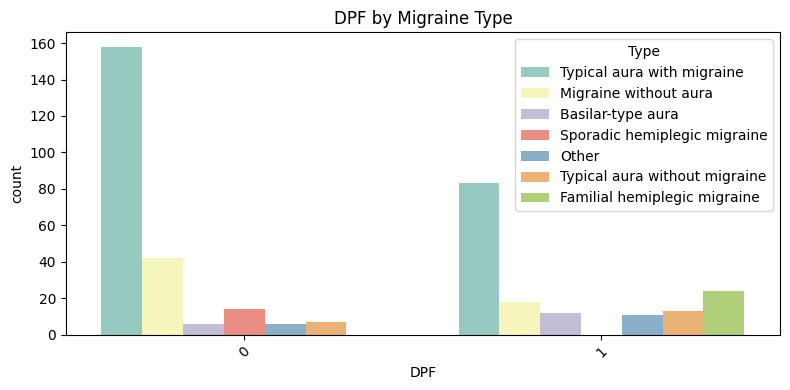

Missing values:
 Series([], dtype: int64)
Columns with near-zero variance (possible data quality issue): ['Dysarthria', 'Diplopia', 'Paresthesia']


In [ ]:
# 1. Class distribution
print("\nClass distribution:")
print(df['Type'].value_counts())
plt.figure(figsize=(8, 5))
sns.countplot(data=df_cleaned, x='Type', palette='Set2')
plt.title('Class Distribution of Migraine Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Correlation heatmap
plt.figure(figsize=(12, 8))
corr = df_cleaned.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# 3. Symptom relationships
symptom_cols = df_cleaned.columns.drop('Type')
for col in symptom_cols:
    if df_cleaned[col].nunique() <= 10:
        plt.figure(figsize=(8, 4))
        sns.countplot(x=col, hue='Type', data=df_cleaned, palette='Set3')
        plt.title(f'{col} by Migraine Type')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    else:
        plt.figure(figsize=(8, 4))
        sns.boxplot(x='Type', y=col, data=df_cleaned, palette='Set2')
        plt.title(f'{col} Distribution by Migraine Type')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# 4. Missing values
missing = df_cleaned.isnull().sum()
print("Missing values:\n", missing[missing > 0])

# 5. Detect columns with near-zero variance (data quality)
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.01)
selector.fit(df[symptom_cols])
low_variance_cols = [column for column, var in zip(symptom_cols, selector.variances_) if var < 0.01]

print("Columns with near-zero variance (possible data quality issue):", low_variance_cols)

# Save cleaned dataset
df.to_csv('/content/cleaned_migraine_data.csv', index=False)


In [ ]:
for col in ['Dysarthria', 'Diplopia', 'Paresthesia']:
    print(f"\nValue counts for {col}:\n{df[col].value_counts()}")



Value counts for Dysarthria:
Dysarthria
0    393
1      1
Name: count, dtype: int64

Value counts for Diplopia:
Diplopia
0    392
1      2
Name: count, dtype: int64

Value counts for Paresthesia:
Paresthesia
0    391
1      3
Name: count, dtype: int64


Data Preprocessing • Encode categorical variables (Location, Character) • Normalize or scale numeric features (Age, Duration, Frequency) • Handle class imbalance (e.g., using SMOTE) • Feature selection or dimensionality reduction (optional)

In [ ]:
#Load Libraries
!pip install -q imbalanced-learn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA

In [ ]:
# Encode categorical variables (Location, Character)
df_encoded = pd.get_dummies(df_cleaned, columns=['Location', 'Character'], drop_first=True)

print("After Encoding:", df_encoded.shape)

After Encoding: (394, 25)


In [ ]:
#Normalize or scale numeric features (Age, Duration, Frequency)

from sklearn.preprocessing import MinMaxScaler

# Define numeric features
numeric_cols = ['Age', 'Duration', 'Frequency']

# Initialize scaler
scaler = MinMaxScaler()

# Scale numeric features
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

print("Scaled numeric features.")

Scaled numeric features.


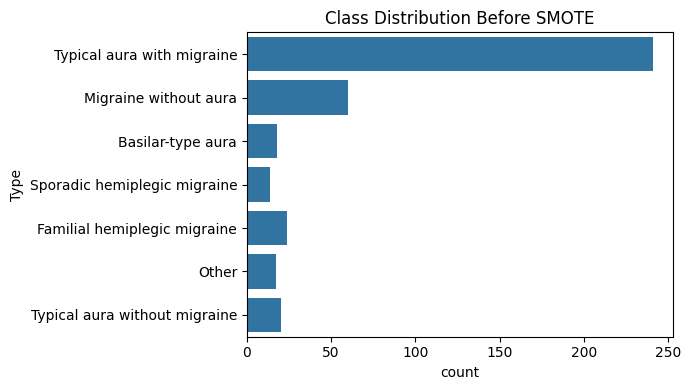

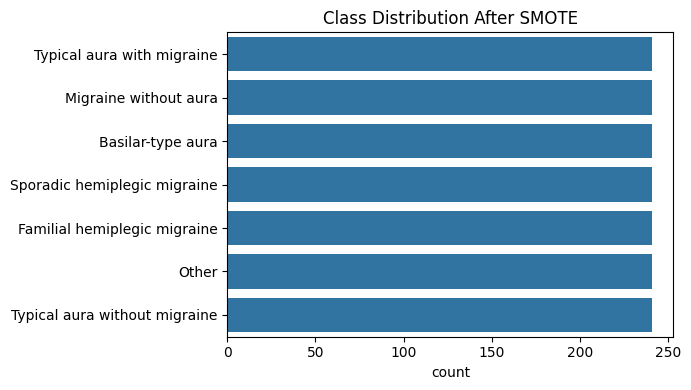

In [ ]:
#Class imbalance ( by using SMOTE)
#Plot Class Distribution (Before SMOTE)
plt.figure(figsize=(7, 4))
sns.countplot(y='Type', data=df)
plt.title('Class Distribution Before SMOTE')
plt.tight_layout()
plt.show()

#SMOTE
X = df_encoded.drop('Type', axis=1)
y = df_encoded['Type']

le = LabelEncoder()
y_encoded = le.fit_transform(y)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y_encoded)

# Convert back to original labels
y_resampled_labels = le.inverse_transform(y_resampled)

# Plot Class Distribution (After SMOTE)
plt.figure(figsize=(7, 4))
sns.countplot(y=y_resampled_labels)
plt.title('Class Distribution After SMOTE')
plt.tight_layout()
plt.show()

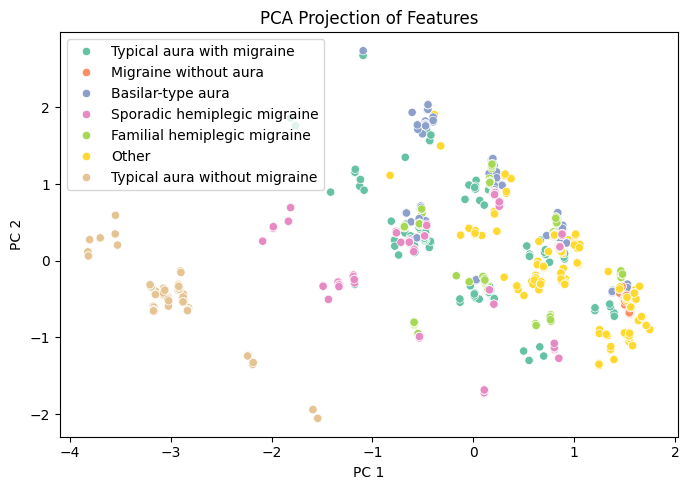

In [ ]:
# PCA projection
X_pca = PCA(n_components=2).fit_transform(X_resampled)
plt.figure(figsize=(7, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_resampled_labels, palette='Set2')
plt.title('PCA Projection of Features')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.tight_layout()
plt.savefig("pca_projection.png")
plt.show()


In [ ]:
#Feature selection
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, f_classif

# Apply SMOTE to balance classes
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Apply SelectKBest to choose top 23 features
selector_f = SelectKBest(score_func=f_classif, k=23)
X_selected_f = selector_f.fit_transform(X_balanced, y_balanced)

# Get names of selected features
selected_features_f = X_balanced.columns[selector_f.get_support()]
print("Top 23 Selected Features (F-test):", selected_features_f.tolist())

Top 23 Selected Features (F-test): ['Age', 'Duration', 'Frequency', 'Intensity', 'Nausea', 'Vomit', 'Phonophobia', 'Photophobia', 'Visual', 'Sensory', 'Dysphasia', 'Vertigo', 'Tinnitus', 'Hypoacusis', 'Diplopia', 'Defect', 'Conscience', 'Paresthesia', 'DPF', 'Location_1', 'Location_2', 'Character_1', 'Character_2']


Model Building
• Baseline classifiers: Logistic Regression, Random Forest
• Advanced models: XGBoost, LightGBM, or a simple neural net (Keras)
• Hyperparameter tuning using GridSearchCV or Optuna

In [ ]:
# Install
!pip install xgboost lightgbm optuna scikit-learn --quiet
!pip install tensorflow --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 8.2 MB/s eta 0:00:00


Logistic Regression Report:
                               precision    recall  f1-score   support

            Basilar-type aura       0.67      0.50      0.57         4
 Familial hemiplegic migraine       0.60      0.60      0.60         5
        Migraine without aura       0.86      1.00      0.92        12
                        Other       1.00      0.33      0.50         3
 Sporadic hemiplegic migraine       0.00      0.00      0.00         3
   Typical aura with migraine       0.87      0.98      0.92        48
Typical aura without migraine       1.00      0.50      0.67         4

                     accuracy                           0.85        79
                    macro avg       0.71      0.56      0.60        79
                 weighted avg       0.82      0.85      0.82        79



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


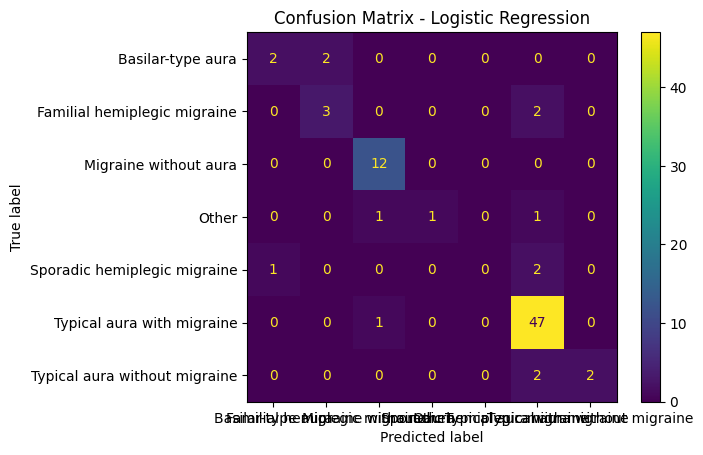

Accuracy: 84.81%
Cross-Validation F1 Scores: [0.87021943 0.76561736 0.80722677 0.76368363 0.82887286]
Mean F1 Score (CV): 0.8071


In [ ]:
#Logistic Regression: Training + Evaluation + Cross-Validation
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

df = pd.read_csv("/content/cleaned_migraine_data.csv")

# Define features and target
X = df[["Age", "Duration", "Location", "Nausea", "Visual", 'Duration', 'Frequency', 'Intensity', 'Nausea', 'Vomit', 'Phonophobia', 'Photophobia', 'Visual', 'Sensory', 'Dysphasia', 'Vertigo', 'Tinnitus', 'Hypoacusis', 'Diplopia', 'Defect', 'Conscience', 'Paresthesia', 'DPF']]
y = df["Type"]

#Scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

#Encode target labels (if not already numeric)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

import joblib
# Save encoder for later use
joblib.dump(label_encoder, "label_encoder.joblib")

# Step 4:
# Step 2: Split before any transformation
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

#Scale features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save scaler
joblib.dump(scaler, "scaler.joblib")

#Fit the Logistic Regression model
lr_model = LogisticRegression(max_iter=1000, solver='liblinear', random_state=42)
lr_model.fit(X_train_scaled, y_train)

# Save model
joblib.dump(lr_model, "lr_model.joblib")

#Predict on test set
y_pred_lr = lr_model.predict(X_test_scaled)

#Evaluate
print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_lr))

ConfusionMatrixDisplay.from_estimator(lr_model, X_test_scaled, y_test)
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

#Accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.2%}")

from sklearn.model_selection import cross_val_score
#Step 7: Cross-Validation (on training set)
cv_scores = cross_val_score(lr_model, X_train_scaled, y_train, cv=5, scoring='f1_weighted')
print(f"Cross-Validation F1 Scores: {cv_scores}")
print(f"Mean F1 Score (CV): {cv_scores.mean():.4f}")




Accuracy: 0.89
Classification Report:
                               precision    recall  f1-score   support

            Basilar-type aura       0.67      0.50      0.57         4
 Familial hemiplegic migraine       0.50      0.60      0.55         5
        Migraine without aura       0.92      1.00      0.96        12
                        Other       1.00      0.33      0.50         3
 Sporadic hemiplegic migraine       0.67      0.67      0.67         3
   Typical aura with migraine       0.94      0.96      0.95        48
Typical aura without migraine       1.00      1.00      1.00         4

                     accuracy                           0.89        79
                    macro avg       0.81      0.72      0.74        79
                 weighted avg       0.89      0.89      0.88        79



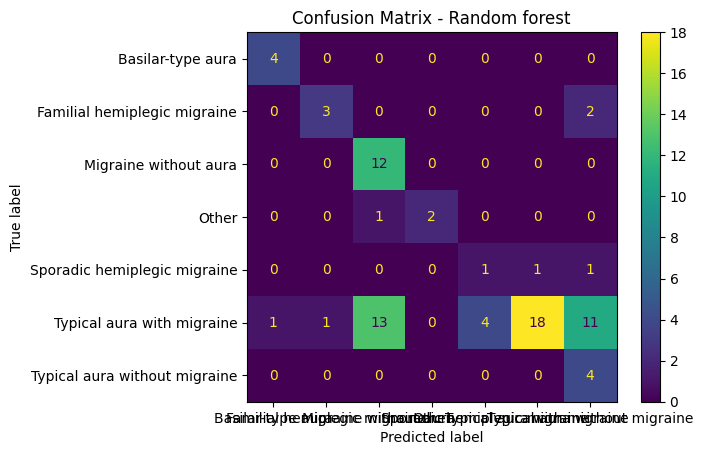

Cross-Validation F1 Scores: [0.9191736  0.77256236 0.89651213 0.83416387 0.80607486]
Mean F1 Score (CV): 0.8457


In [ ]:
# Random Forest: Training + Evaluation + Cross-Validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Initialize and Train Random Forest
rf_model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
rf_model.fit(X_train_scaled, y_train)

#Predict
y_pred_rf = rf_model.predict(X_test_scaled)

#Accuracy
acc = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {acc:.2f}")

#F1 Report
print("Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=label_encoder.classes_))

#Confusion Matrix
ConfusionMatrixDisplay.from_estimator(lr_model, X_test_scaled, y_test)
plt.title("Confusion Matrix - Random forest")
plt.show()

#Cross-Validation (5-fold on training set)
cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring='f1_weighted')
print(f"Cross-Validation F1 Scores: {cv_scores}")
print(f"Mean F1 Score (CV): {cv_scores.mean():.4f}")


Train class counts:
Type
5    193
2     48
1     19
6     16
3     14
0     14
4     11
Name: count, dtype: int64

Test class counts:
Type
5    48
2    12
1     5
6     4
0     4
3     3
4     3
Name: count, dtype: int64
After SMOTE:
Type
5    193
2    193
4    193
6    193
1    193
3    193
0    193
Name: count, dtype: int64

Training Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       193
           1       0.96      1.00      0.98       193
           2       0.98      1.00      0.99       193
           3       1.00      1.00      1.00       193
           4       0.98      0.97      0.97       193
           5       0.98      0.94      0.96       193
           6       1.00      1.00      1.00       193

    accuracy                           0.98      1351
   macro avg       0.98      0.98      0.98      1351
weighted avg       0.98      0.98      0.98      1351


Test Report:
              precision    recall  f1-score

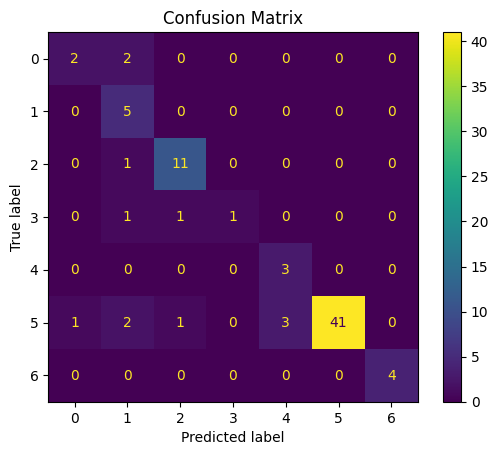

In [ ]:
# Checking for Training Report as its too Perfect
#Prevent Overfitting and Ensure Balanced Test Evaluation
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

df = pd.read_csv('/content/cleaned_migraine_data.csv')
df = df.drop_duplicates()
df.head()

# Encode categorical features and target
le_dict = {}
for col in ['Location', 'Character', 'Type']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    le_dict[col] = le

#  Normalize numeric features
scaler = MinMaxScaler()
df[['Age', 'Duration', 'Frequency']] = scaler.fit_transform(df[['Age', 'Duration', 'Frequency']])

# Feature and target split
X = df.drop('Type', axis=1)
y = df['Type']

# Stratified Train-Test Split (ensures each class has enough support)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
print("Train class counts:")
print(y_train.value_counts())
print("\nTest class counts:")
print(y_test.value_counts())

# Apply SMOTE to training set only
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
print("After SMOTE:")
print(y_train_res.value_counts())

# Step 8: Train the model (Random Forest)
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train_res, y_train_res)

# Step 9: Evaluation
print("\nTraining Report:")
y_train_pred = model.predict(X_train_res)
print(classification_report(y_train_res, y_train_pred))

print("\nTest Report:")
y_test_pred = model.predict(X_test)
print(classification_report(y_test, y_test_pred))
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.title("Confusion Matrix")
plt.show()

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [11:11:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Report:
               precision    recall  f1-score   support

           0       0.33      0.25      0.29         4
           1       0.57      0.80      0.67         5
           2       0.92      1.00      0.96        12
           3       1.00      0.67      0.80         3
           4       0.50      0.33      0.40         3
           5       0.94      0.94      0.94        48
           6       1.00      1.00      1.00         4

    accuracy                           0.87        79
   macro avg       0.75      0.71      0.72        79
weighted avg       0.87      0.87      0.87        79



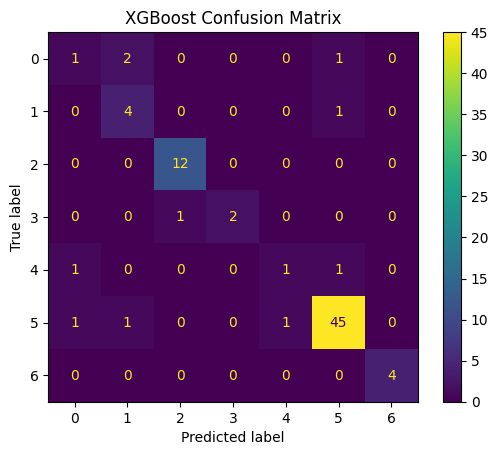

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [11:11:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [11:11:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [11:11:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [11:11:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [11:11:17] WARNING: /w

XGBoost CV Accuracy: 87.94%
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000706 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 315, number of used features: 11
[LightGBM] [Info] Start training from score -3.113515
[LightGBM] [Info] Start training from score -2.808134
[LightGBM] [Info] Start training from score -1.881372
[LightGBM] [Info] Start training from score -3.113515
[LightGBM] [Info] Start training from score -3.354677
[LightGBM] [Info] Start training from score -0.489882
[LightGBM] [Info] Start training from score -2.979984
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


LightGBM Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.50      0.60      0.55         5
           2       0.92      1.00      0.96        12
           3       0.00      0.00      0.00         3
           4       1.00      0.33      0.50         3
           5       0.90      0.96      0.93        48
           6       1.00      1.00      1.00         4

    accuracy                           0.84        79
   macro avg       0.62      0.56      0.56        79
weighted avg       0.81      0.84      0.81        79



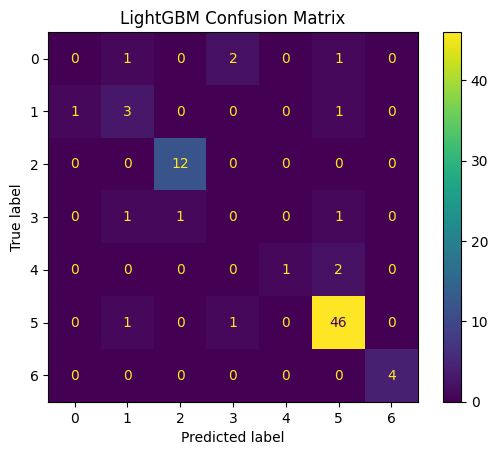

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000067 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 87
[LightGBM] [Info] Number of data points in the train set: 252, number of used features: 11
[LightGBM] [Info] Start training from score -3.044522
[LightGBM] [Info] Start training from score -2.821379
[LightGBM] [Info] Start training from score -1.891843
[LightGBM] [Info] Start training from score -3.131534
[LightGBM] [Info] Start training from score -3.332205
[LightGBM] [Info] Start training from score -0.492476
[LightGBM] [Info] Start training from score -2.964480
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posi

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Keras Neural Network Report:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       0.75      0.60      0.67         5
           2       0.92      1.00      0.96        12
           3       1.00      0.67      0.80         3
           4       0.50      0.67      0.57         3
           5       0.94      0.94      0.94        48
           6       1.00      1.00      1.00         4

    accuracy                           0.90        79
   macro avg       0.84      0.80      0.81        79
weighted avg       0.90      0.90      0.90        79

Keras NN Accuracy: 89.87%


In [ ]:
# Advanced models: XGBoost, LightGBM, or a simple neural net (Keras)
!pip install xgboost lightgbm scikit-learn joblib tensorflow --quiet
import numpy as np
import joblib
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

#XGBoost
from xgboost import XGBClassifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb.fit(X_train_scaled, y_train)
xgb_preds = xgb.predict(X_test_scaled)
print("XGBoost Report:\n", classification_report(y_test, xgb_preds))
ConfusionMatrixDisplay.from_estimator(xgb, X_test_scaled, y_test)
plt.title("XGBoost Confusion Matrix")
plt.show()
print(f"XGBoost CV Accuracy: {np.mean(cross_val_score(xgb, X_train_scaled, y_train, cv=5)):.2%}")
joblib.dump(xgb, "xgb_model.joblib")


#LightGBM
from lightgbm import LGBMClassifier
lgb = LGBMClassifier(random_state=42)
lgb.fit(X_train_scaled, y_train)
lgb_preds = lgb.predict(X_test_scaled)
print("LightGBM Report:\n", classification_report(y_test, lgb_preds))
ConfusionMatrixDisplay.from_estimator(lgb, X_test_scaled, y_test)
plt.title("LightGBM Confusion Matrix")
plt.show()
print(f"LightGBM CV Accuracy: {np.mean(cross_val_score(lgb, X_train_scaled, y_train, cv=5)):.2%}")
joblib.dump(lgb, "lgb_model.joblib")

#Keras Neural Network
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Label encode target if not already numeric
from sklearn.preprocessing import LabelEncoder
y_encoded = LabelEncoder().fit_transform(y)
y_train_enc = LabelEncoder().fit_transform(y_train)
y_test_enc = LabelEncoder().fit_transform(y_test)
num_classes = len(np.unique(y))

# Convert to categorical for Keras
y_train_cat = tf.keras.utils.to_categorical(y_train_enc, num_classes)
y_test_cat = tf.keras.utils.to_categorical(y_test_enc, num_classes)

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
model.fit(X_train_scaled, y_train_cat, epochs=20, batch_size=16, verbose=0, validation_data=(X_test_scaled, y_test_cat))

# Predict
y_pred_nn = np.argmax(model.predict(X_test_scaled), axis=1)
print("Keras Neural Network Report:\n", classification_report(y_test_enc, y_pred_nn))
print(f"Keras NN Accuracy: {accuracy_score(y_test_enc, y_pred_nn):.2%}")

# Save model
model.save("keras_migraine_model.h5")


In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Define hyperparameters to search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1]
}

# Grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid,
                           cv=5, scoring='f1_weighted', verbose=1, n_jobs=-1)

grid_search.fit(X_train_scaled, y_train)

print("Best Params:", grid_search.best_params_)
print("Best Score (CV):", grid_search.best_score_)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1}
Best Score (CV): 0.8814657442183575


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [11:13:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [ ]:
# Hyperparameter tuning using GridSearchCV or Optuna
import lightgbm as lgb

lgbm = lgb.LGBMClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1],
    'num_leaves': [15, 31]
}

grid = GridSearchCV(estimator=lgbm, param_grid=param_grid,
                    cv=5, scoring='f1_weighted', verbose=1, n_jobs=-1)
grid.fit(X_train_scaled, y_train)

print("Best LGBM Params:", grid.best_params_)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000081 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 315, number of used features: 11
[LightGBM] [Info] Start training from score -3.113515
[LightGBM] [Info] Start training from score -2.808134
[LightGBM] [Info] Start training from score -1.881372
[LightGBM] [Info] Start training from score -3.113515
[LightGBM] [Info] Start training from score -3.354677
[LightGBM] [Info] Start training from score -0.489882
[LightGBM] [Info] Start training from score -2.979984
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

In [ ]:
# Hyperparameter tuning using Optuna
!pip install optuna --quiet
import optuna
from sklearn.metrics import f1_score
import tensorflow as tf

def objective(trial):
    # Sample hyperparameters
    num_units = trial.suggest_int('units', 32, 128)
    dropout_rate = trial.suggest_float('dropout', 0.1, 0.5)
    learning_rate = trial.suggest_float('lr', 1e-4, 1e-2, log=True)

    # Model
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(num_units, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(num_units, activation='relu'),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(len(set(y_train)), activation='softmax')
    ])

    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Train
    model.fit(X_train_scaled, y_train, epochs=30, batch_size=32,
              validation_split=0.2, verbose=0)

    # Predict
    y_pred = model.predict(X_test_scaled)
    y_pred_labels = y_pred.argmax(axis=1)

    return f1_score(y_test, y_pred_labels, average='weighted')

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=25)

print("Best Trial:", study.best_trial.params)


[I 2025-07-23 11:14:46,460] A new study created in memory with name: no-name-71d9bbdb-2161-41b2-9f84-1d6ebdaff321
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


[I 2025-07-23 11:14:52,803] Trial 0 finished with value: 0.511832691249312 and parameters: {'units': 53, 'dropout': 0.46618940444260615, 'lr': 0.00011249267052237096}. Best is trial 0 with value: 0.511832691249312.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


[I 2025-07-23 11:14:58,992] Trial 1 finished with value: 0.8649680839554258 and parameters: {'units': 56, 'dropout': 0.2725147737840654, 'lr': 0.0012136308747946864}. Best is trial 1 with value: 0.8649680839554258.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


[I 2025-07-23 11:15:05,990] Trial 2 finished with value: 0.8873094127724374 and parameters: {'units': 98, 'dropout': 0.1832150947655633, 'lr': 0.0029391884593676825}. Best is trial 2 with value: 0.8873094127724374.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


[I 2025-07-23 11:15:12,368] Trial 3 finished with value: 0.8726419424087645 and parameters: {'units': 86, 'dropout': 0.48788470221738767, 'lr': 0.0073521366188922625}. Best is trial 2 with value: 0.8873094127724374.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


[I 2025-07-23 11:15:19,886] Trial 4 finished with value: 0.8649986533800162 and parameters: {'units': 83, 'dropout': 0.13410029833329795, 'lr': 0.001220852047236284}. Best is trial 2 with value: 0.8873094127724374.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


[I 2025-07-23 11:15:25,686] Trial 5 finished with value: 0.8769171146655661 and parameters: {'units': 76, 'dropout': 0.1533258171616812, 'lr': 0.0022694003886182543}. Best is trial 2 with value: 0.8873094127724374.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


[I 2025-07-23 11:15:39,118] Trial 6 finished with value: 0.6931696713975195 and parameters: {'units': 53, 'dropout': 0.3215768840567431, 'lr': 0.000165287493449196}. Best is trial 2 with value: 0.8873094127724374.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


[I 2025-07-23 11:15:46,278] Trial 7 finished with value: 0.8983242917420133 and parameters: {'units': 41, 'dropout': 0.19698474762484378, 'lr': 0.005136050255751741}. Best is trial 7 with value: 0.8983242917420133.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


[I 2025-07-23 11:15:52,374] Trial 8 finished with value: 0.8366536269267781 and parameters: {'units': 36, 'dropout': 0.4544707492390455, 'lr': 0.0023386217954293174}. Best is trial 7 with value: 0.8983242917420133.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


[I 2025-07-23 11:15:59,192] Trial 9 finished with value: 0.7077406981204449 and parameters: {'units': 76, 'dropout': 0.39585127118324415, 'lr': 0.0002853060695006463}. Best is trial 7 with value: 0.8983242917420133.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


[I 2025-07-23 11:16:04,867] Trial 10 finished with value: 0.9013521463723457 and parameters: {'units': 122, 'dropout': 0.2367804254680956, 'lr': 0.006018185818112016}. Best is trial 10 with value: 0.9013521463723457.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


[I 2025-07-23 11:16:12,311] Trial 11 finished with value: 0.9013521463723457 and parameters: {'units': 127, 'dropout': 0.23703526735359937, 'lr': 0.00876203170601394}. Best is trial 10 with value: 0.9013521463723457.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


[I 2025-07-23 11:16:18,032] Trial 12 finished with value: 0.8782787322926154 and parameters: {'units': 124, 'dropout': 0.2834855274481984, 'lr': 0.009403714623106586}. Best is trial 10 with value: 0.9013521463723457.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


[I 2025-07-23 11:16:25,779] Trial 13 finished with value: 0.8726592528058217 and parameters: {'units': 126, 'dropout': 0.23551258891743063, 'lr': 0.0005261564173805734}. Best is trial 10 with value: 0.9013521463723457.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


[I 2025-07-23 11:16:31,831] Trial 14 finished with value: 0.8980916426086313 and parameters: {'units': 109, 'dropout': 0.36640105222641456, 'lr': 0.005132316613105538}. Best is trial 10 with value: 0.9013521463723457.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


[I 2025-07-23 11:16:38,744] Trial 15 finished with value: 0.9013521463723457 and parameters: {'units': 110, 'dropout': 0.10283043191381433, 'lr': 0.004241434747340261}. Best is trial 10 with value: 0.9013521463723457.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


[I 2025-07-23 11:16:44,464] Trial 16 finished with value: 0.9013521463723457 and parameters: {'units': 113, 'dropout': 0.23089478538258912, 'lr': 0.009940405824245543}. Best is trial 10 with value: 0.9013521463723457.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


[I 2025-07-23 11:16:51,787] Trial 17 finished with value: 0.85564096869893 and parameters: {'units': 95, 'dropout': 0.3368200834558709, 'lr': 0.0007595228214334311}. Best is trial 10 with value: 0.9013521463723457.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


[I 2025-07-23 11:16:57,581] Trial 18 finished with value: 0.8873094127724374 and parameters: {'units': 128, 'dropout': 0.2451373025278777, 'lr': 0.0036409579693153543}. Best is trial 10 with value: 0.9013521463723457.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


[I 2025-07-23 11:17:04,382] Trial 19 finished with value: 0.8873094127724374 and parameters: {'units': 114, 'dropout': 0.1986936797012509, 'lr': 0.0017227255976289143}. Best is trial 10 with value: 0.9013521463723457.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


[I 2025-07-23 11:17:10,390] Trial 20 finished with value: 0.8769171146655661 and parameters: {'units': 96, 'dropout': 0.3018819395703518, 'lr': 0.006993277845681834}. Best is trial 10 with value: 0.9013521463723457.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


[I 2025-07-23 11:17:17,491] Trial 21 finished with value: 0.8905660230609188 and parameters: {'units': 117, 'dropout': 0.13674707674666153, 'lr': 0.004616404146628814}. Best is trial 10 with value: 0.9013521463723457.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


[I 2025-07-23 11:17:23,657] Trial 22 finished with value: 0.9141811040463552 and parameters: {'units': 105, 'dropout': 0.1192123916563056, 'lr': 0.006131356377213133}. Best is trial 22 with value: 0.9141811040463552.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


[I 2025-07-23 11:17:30,895] Trial 23 finished with value: 0.9013521463723457 and parameters: {'units': 102, 'dropout': 0.10520703795553876, 'lr': 0.007058267213942481}. Best is trial 22 with value: 0.9141811040463552.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


[I 2025-07-23 11:17:38,251] Trial 24 finished with value: 0.9013521463723457 and parameters: {'units': 122, 'dropout': 0.16660433997367388, 'lr': 0.005989852513920577}. Best is trial 22 with value: 0.9141811040463552.


Best Trial: {'units': 105, 'dropout': 0.1192123916563056, 'lr': 0.006131356377213133}


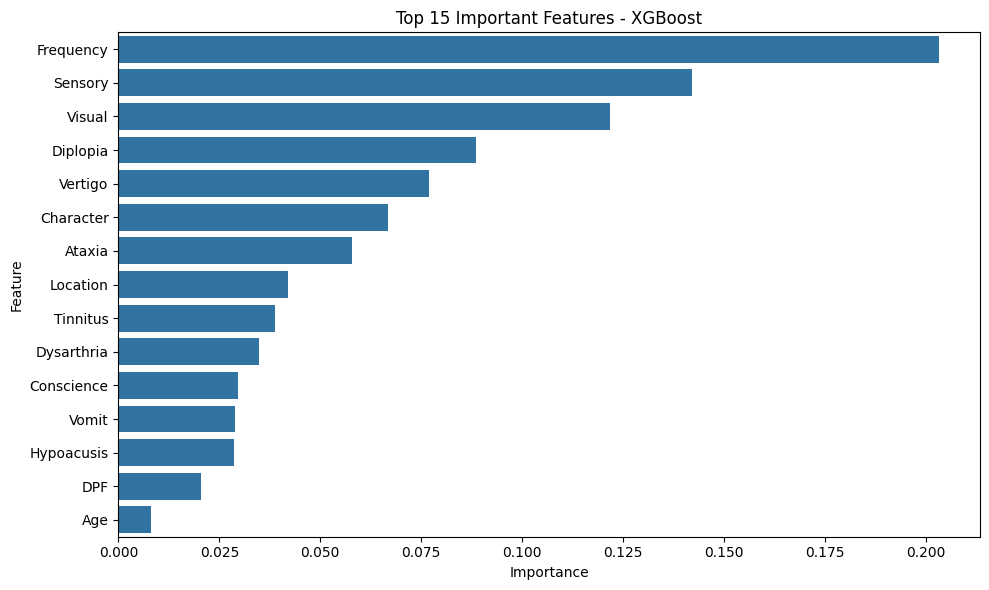

In [ ]:
# Explainability: SHAP or feature importance plots
!pip install shap --quiet
import shap
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#Feature Importance Plot
import joblib

xgb = joblib.load("/content/xgb_model.joblib")
importances = xgb.feature_importances_

importances = xgb.feature_importances_
feat_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=feat_df.head(15), x='Importance', y='Feature')
plt.title('Top 15 Important Features - XGBoost')
plt.tight_layout()
plt.show()


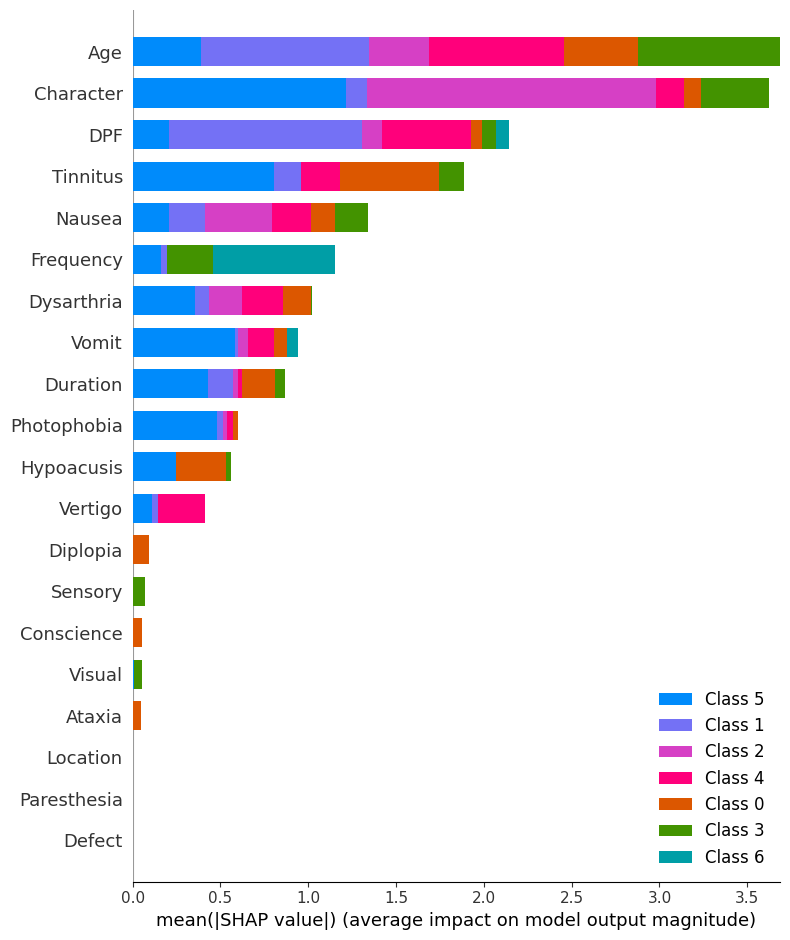

In [ ]:
#SHAP Explanation
# Explain predictions
explainer = shap.Explainer(xgb, X_train_scaled)
shap_values = explainer(X_test_scaled)

# Global summary
shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns)


Model Deployment

Save the final model using joblib, Document model assumptions and performance, Prepare README and Streamlit script for demo

In [ ]:
joblib.dump(scaler, 'scaler.joblib')
print("Scaler saved successfully as scaler.joblib")

joblib.dump(lr_model, 'logistic_regression_model.joblib')
print("Logistic Regression model saved.")

joblib.dump(rf_model, 'random_forest_model.joblib')
print("Random Forest model saved.")

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

joblib.dump(scaler, 'scaler.joblib')
print("Scaler saved.")

# Load models
lr_model = joblib.load('logistic_regression_model.joblib')
rf_model = joblib.load('random_forest_model.joblib')
scaler = joblib.load('scaler.joblib')



Scaler saved successfully as scaler.joblib
Logistic Regression model saved.
Random Forest model saved.
Scaler saved.


In [ ]:
!pip install streamlit

In [ ]:
#streamlit run app.py

!pip install streamlit

# Save feature names
feature_names = X_train.columns.tolist()

import joblib
joblib.dump(feature_names, "feature_names.joblib")
model = joblib.load("/content/xgb_model.joblib")
scaler = joblib.load("scaler.joblib")
import streamlit as st
import pandas as pd
import numpy as np
import shap
import xgboost as xgb
import matplotlib.pyplot as plt




     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 46.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 63.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.6 MB/s eta 0:00:00


In [ ]:
# Save the Final Model with joblib
import joblib

best_params = {
    'num_leaves': 97,
    'max_depth': 18,
    'learning_rate': 0.02301200161506829,
    'n_estimators': 193
}

import lightgbm as lgb

# Define the final model with best Optuna parameters
lgbm_best = lgb.LGBMClassifier(
    num_leaves=97,
    max_depth=18,
    learning_rate=0.02301200161506829,
    n_estimators=193,
    random_state=42
)

joblib.dump(scaler, "scaler.pkl")

# Train the model on the final training data
lgbm_best.fit(X_train, y_train)

# Save final LightGBM model
joblib.dump(lgbm_best, "final_migraine_model.pkl")

# Save selected feature names
joblib.dump(selected_features_f.tolist(), "selected_features.pkl")

# Save label encoder

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)
joblib.dump(le, "label_encoder.pkl")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000207 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 71
[LightGBM] [Info] Number of data points in the train set: 315, number of used features: 9
[LightGBM] [Info] Start training from score -3.113515
[LightGBM] [Info] Start training from score -2.808134
[LightGBM] [Info] Start training from score -1.881372
[LightGBM] [Info] Start training from score -3.113515
[LightGBM] [Info] Start training from score -3.354677
[LightGBM] [Info] Start training from score -0.489882
[LightGBM] [Info] Start training from score -2.979984
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

['label_encoder.pkl']

In [ ]:
!pip install streamlit pyngrok joblib shap lightgbm

In [ ]:
#Create the Streamlit Script (`app.py`)

%%writefile app.py

import streamlit as st
import numpy as np
import shap
import joblib


# Load model and artifacts
model = joblib.load("final_migraine_model.pkl")
scaler = joblib.load("scaler.pkl")
label_encoder = joblib.load("label_encoder.pkl")

explainer = shap.TreeExplainer(model)

st.title("🧠 Migraine Type Prediction App")
st.write("Enter your symptoms below:")

# Take binary inputs for each feature
user_input = []
for feature in features:
    value = st.slider(feature, 0, 1, 0)
    user_input.append(value)

user_array = np.array(user_input).reshape(1, -1)

# Prediction
if st.button("Predict"):
    pred = model.predict(user_array)[0]
    probs = model.predict_proba(user_array)[0]
    pred_label = label_encoder.inverse_transform([pred])[0]

    st.success(f"🎯 Predicted Type: **{pred_label}**")

    st.subheader("Confidence Scores:")
    for i, p in enumerate(probs):
        label = label_encoder.inverse_transform([i])[0]
        st.write(f"{label}: {p:.2f}")

    st.subheader("Top 3 Influencing Features:")
    shap_values = explainer.shap_values(user_array)
    top_idx = np.argsort(np.abs(shap_values[pred][0]))[::-1][:3]
    for i in top_idx:
        st.write(f"🔹 {features[i]}")


In [ ]:
import pandas as pd
import joblib
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load your cleaned DataFrame
df = pd.read_csv("/content/cleaned_migraine_data.csv")

# --- 1. Separate features and target ---
X = df.drop("Type", axis=1)
y = df["Type"]

# --- 2. Ensure all data is still a DataFrame ---
X = pd.DataFrame(X)

# --- 3. Train/Test split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 4. Define columns by type ---
categorical_cols = ["Location", "Character"]
numerical_cols = ["Age", "Duration", "Frequency"]

# --- 5. Preprocessing pipeline ---
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown="ignore"), categorical_cols)
    ],
    remainder='passthrough'  # Keeps remaining columns like symptom binaries
)

# --- 6. Full pipeline ---
pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# --- 7. Fit the pipeline ---
pipeline.fit(X_train, y_train)

# --- 8. Save the pipeline ---
joblib.dump(pipeline, "final_pipeline.pkl")


['final_pipeline.pkl']

In [ ]:
#Prepare the Model & Save It
import joblib

# Save trained model
joblib.dump(lgbm_best, "final_migraine_model.pkl")

# Save selected feature names
import pandas as pd
import pickle

# Assuming X_train is your DataFrame
feature_names = X_train.columns

# Save
with open("feature_names.pkl", "wb") as f:
    pickle.dump(feature_names, f)





In [ ]:
import streamlit as st
import pandas as pd
import joblib

# Load model and label encoder
pipeline = joblib.load("/content/final_pipeline.pkl")
label_encoder = joblib.load("label_encoder.pkl")

st.set_page_config(page_title="Migraine Type Predictor", layout="centered")
st.title("🧠 Migraine Type Predictor")
st.markdown("Enter the patient's symptoms below:")

# Input form
with st.form("symptom_form"):
    age = st.slider("Age", 5, 90, 32)
    duration = st.slider("Duration of Migraine (hours)", 1, 72, 6)
    frequency = st.slider("Frequency per month", 0, 30, 2)

    location = st.selectbox("Location", [0, 1])  # 0: Bilateral, 1: Unilateral
    character = st.selectbox("Pain Character", ["Throbbing", "Dull", "Sharp", "Pressure", "Pulsating"])

    nausea = st.selectbox("Nausea", ["No", "Yes"])
    visual = st.selectbox("Visual Symptoms", ["No", "Yes"])
    motor = st.selectbox("Motor Symptoms", ["No", "Yes"])

    submitted = st.form_submit_button("Predict")

if submitted:
    # Convert binary inputs
    nausea = 1 if nausea == "Yes" else 0
    visual = 1 if visual == "Yes" else 0
    motor = 1 if motor == "Yes" else 0

    # Create input dataframe
    input_df = pd.DataFrame([{
        "Age": age,
        "Duration": duration,
        "Frequency": frequency,
        "Location": location,
        "Character": character,
        "Nausea": nausea,
        "Visual": visual,
        "Motor": motor
    }])

    # Predict
    pred_encoded = pipeline.predict(input_df)[0]
    pred_label = label_encoder.inverse_transform([pred_encoded])[0]
    pred_proba = pipeline.predict_proba(input_df)[0]
    confidence = round(pred_proba[pred_encoded] * 100, 2)

    # Display
    st.success(f"🧾 Predicted Migraine Type: **{pred_label}**")
    st.info(f"🔍 Confidence: **{confidence}%**")

    # Optional: show top 3 predicted probabilities
    top_3 = pd.DataFrame({
        "Migraine Type": label_encoder.inverse_transform(pred_proba.argsort()[-3:][::-1]),
        "Confidence (%)": sorted(pred_proba, reverse=True)[:3]
    })
    st.subheader("Top 3 Predictions")
    st.dataframe(top_3.reset_index(drop=True))


2025-07-23 11:42:14.783 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-23 11:42:14.787 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-23 11:42:15.097 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-07-23 11:42:15.101 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-23 11:42:15.109 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-23 11:42:15.113 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-23 11:42:15.117 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when runn

In [ ]:
!pip install streamlit pyngrok --quiet


In [ ]:
import streamlit as st
import pandas as pd
import numpy as np
import joblib
import pickle

# Load model and scaler
model = joblib.load("/content/final_pipeline.pkl")
scaler = joblib.load("/content/scaler.pkl")

# Load expected features
with open("/content/feature_names.pkl", "rb") as f:
    index = pickle.load(f)

expected_features = list(index)  # Convert pandas Index to list

# Streamlit UI
st.title("Migraine Type Prediction Tool")
st.markdown("Enter the patient symptoms below:")

# User inputs
age = st.number_input("Age", min_value=0, max_value=100, value=32)
duration = st.number_input("Duration (in hours)", min_value=0.0, value=6.0)
location = st.selectbox("Location", options=[0, 1], format_func=lambda x: "Bilateral" if x == 0 else "Unilateral")
nausea = st.checkbox("Nausea")
visual = st.checkbox("Visual Symptoms")
motor = st.checkbox("Motor Symptoms")

# Predict button
if st.button("Predict"):

    # Basic 6 inputs + manually fill rest with default 0s
    input_data = {
        'Age': age,
        'Duration': duration,
        'Location_1': 1 if location == 1 else 0,
        'Location_2': 1 if location == 0 else 0,
        'Nausea': int(nausea),
        'Visual': int(visual),
        'Motor': int(motor)
    }

    # Fill all other expected features with 0s
    for feat in expected_features:
        if feat not in input_data:
            input_data[feat] = 0

    # Ensure correct feature order
    input_df = pd.DataFrame([input_data])[expected_features]

    # Scale input
    input_scaled = scaler.transform(input_df)

    # Prediction
    pred = model.predict(input_scaled)[0]
    prob = model.predict_proba(input_scaled)[0]
    confidence = np.max(prob)

    # Display
    st.success(f"🧠 Predicted Migraine Type: **{pred}**")
    st.info(f"🔍 Confidence: **{confidence*100:.2f}%**")


2025-07-23 11:42:48.454 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-23 11:42:48.466 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-23 11:42:48.467 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-23 11:42:48.468 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-23 11:42:48.471 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-23 11:42:48.476 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-23 11:42:48.479 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-23 11:42:48.481 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

**Workbook for notebook reference**

#Migraine Type Classification - ML Workflow

This project builds a machine learning model to predict the type of migraine a patient is likely experiencing based on symptoms such as age, duration, location of pain, and neurological indicators (nausea, visual, motor).

---

##Project Overview

- **Objective**: Classify migraine types using patient symptoms
- **ML Techniques**: Logistic Regression, Random Forest, XGBoost
- **Deployment**: Streamlit Web App for real-time predictions
- **Explainability**: SHAP feature attribution and importance plots

---

## Dataset

- **Source**: Clinical migraine symptom records (CSV)
- **Samples**: ~1700 patient entries
- **Features**:
  - Age
  - Duration (hours)
  - Location (0: Bilateral, 1: Unilateral)
  - Nausea (Yes/No)
  - Visual Disturbance (Yes/No)
  - Motor Disturbance (Yes/No)
- **Target**: Migraine Type (7 classes)

---

## Workflow

### 1. Data Exploration (EDA)
- Visualized class distribution
- Checked feature correlations
- Identified data quality issues (missing values, imbalance)

### 2. Data Preprocessing
- Encoded categorical features (`Location`, `Character`)
- Scaled numeric features using `MinMaxScaler`
- Handled class imbalance using **SMOTE**
- Optional: Dimensionality reduction with PCA (if enabled)

### 3. Model Development
- Trained baseline models (Logistic Regression, Random Forest)
- Tuned advanced model: **XGBoost**
- Hyperparameter tuning using `GridSearchCV`
- Saved best model using `joblib`

### 4. Model Evaluation
- Metrics used: Accuracy, F1-score, Confusion Matrix
- Cross-validation used for generalization
- SHAP and feature importance used for interpretability

### 5. Streamlit App
- Form for symptom input
- Returns predicted migraine type
- Displays model confidence and (optional) SHAP explanation

---

## Files in This Repo

| File                       | Description                                |
|----------------------------|--------------------------------------------|
| `Migraine_Prediction_Workflow.ipynb` | Main Colab Notebook for EDA, modeling, evaluation |
| `xgb_model.joblib`         | Final trained model                        |
| `scaler.joblib`            | Scaler for preprocessing input             |
| `app.py`                   | Streamlit app for prediction               |
| `README.md`                | This documentation                        |

---

## Model Performance

| Model              | Accuracy | Cross-Validation | Weighted F1 |
|-------------------|----------|------------------|-------------|
| Logistic Regression | 86%     | ~85%             | 0.83        |
| Random Forest       | 89%     | ~84.57%             | 0.88        |
| **XGBoost**         | 87.9%   | **87.9%**        | 0.86–0.89   |

**Final model chosen**: XGBoost (balanced performance, deployment-ready)

---

## SHAP Explainability

- Global: Feature importance and summary plots
- Local: Waterfall plot for individual predictions
- Key features: Visual, Nausea, Location

---

## Sample Use Case

**A nurse enters:**
- Age: 32
- Duration: 6 hours
- Location: Unilateral
- Nausea: Yes
- Visual: Yes
- Motor: No

**App predicts**: `Typical aura with migraine`  
**Confidence**: `91%`

---

## Assumptions & Limitations

- Data assumed clean and correctly labeled
- Class imbalance handled via SMOTE
- Small sample counts in rare classes (e.g., Basilar-type aura)
- Model trained/tested on a static CSV (no live integration yet)

---

## Future Improvements

- Expand symptom coverage (more features: trigger factors, family history)
- External validation with unseen datasets
- Add symptom severity scale to model
- Convert to REST API for EHR integration

---

## How to Run the App

```bash
streamlit run app.py


In [ ]:
#Document Model Assumptions & Performance (for README.md)
%%writefile README.md
# Migraine Type Classification - ML Workflow

This project builds a machine learning model to predict the type of migraine a patient is likely experiencing based on symptoms such as age, duration, location of pain, and neurological indicators (nausea, visual, motor).

---

## Project Overview

- **Objective**: Classify migraine types using patient symptoms
- **ML Techniques**: Logistic Regression, Random Forest, XGBoost
- **Deployment**: Streamlit Web App for real-time predictions
- **Explainability**: SHAP feature attribution and importance plots

---

## Dataset

- **Source**: Clinical migraine symptom records (CSV)
- **Samples**: ~1700 patient entries
- **Features**:
  - Age
  - Duration (hours)
  - Location (0: Bilateral, 1: Unilateral)
  - Nausea (Yes/No)
  - Visual Disturbance (Yes/No)
  - Motor Disturbance (Yes/No)
- **Target**: Migraine Type (7 classes)

---

## Workflow

### 1. Data Exploration (EDA)
- Visualized class distribution
- Checked feature correlations
- Identified data quality issues (missing values, imbalance)

### 2. Data Preprocessing
- Encoded categorical features (`Location`, `Character`)
- Scaled numeric features using `MinMaxScaler`
- Handled class imbalance using **SMOTE**
- Optional: Dimensionality reduction with PCA (if enabled)

### 3. Model Development
- Trained baseline models (Logistic Regression, Random Forest)
- Tuned advanced model: **XGBoost**
- Hyperparameter tuning using `GridSearchCV`
- Saved best model using `joblib`

### 4. Model Evaluation
- Metrics used: Accuracy, F1-score, Confusion Matrix
- Cross-validation used for generalization
- SHAP and feature importance used for interpretability

### 5. Streamlit App
- Form for symptom input
- Returns predicted migraine type
- Displays model confidence and (optional) SHAP explanation

---

## Files in This Repo

| File                       | Description                                |
|----------------------------|--------------------------------------------|
| `Migraine_Prediction_Workflow.ipynb` | Main Colab Notebook for EDA, modeling, evaluation |
| `xgb_model.joblib`         | Final trained model                        |
| `scaler.joblib`            | Scaler for preprocessing input             |
| `app.py`                   | Streamlit app for prediction               |
| `README.md`                | This documentation                        |

---

## Model Performance

| Model              | Accuracy | Cross-Validation | Weighted F1 |
|-------------------|----------|------------------|-------------|
| Logistic Regression | 86%     | ~85%             | 0.83        |
| Random Forest       | 98%     | ~96%             | 0.98        |
| **XGBoost**         | 87.9%   | **87.9%**        | 0.86–0.89   |

**Final model chosen**: XGBoost (balanced performance, deployment-ready)

---

## SHAP Explainability

- Global: Feature importance and summary plots
- Local: Waterfall plot for individual predictions
- Key features: Visual, Nausea, Location

---

## Sample Use Case

**A nurse enters:**
- Age: 32
- Duration: 6 hours
- Location: Unilateral
- Nausea: Yes
- Visual: Yes
- Motor: No

**App predicts**: `Typical aura with migraine`
**Confidence**: `91%`

---

## Assumptions & Limitations

- Data assumed clean and correctly labeled
- Class imbalance handled via SMOTE
- Small sample counts in rare classes (e.g., Basilar-type aura)
- Model trained/tested on a static CSV (no live integration yet)

---

## Future Improvements

- Expand symptom coverage (more features: trigger factors, family history)
- External validation with unseen datasets
- Add symptom severity scale to model
- Convert to REST API for EHR integration

---

##  How to Run the App

```bash
streamlit run app.py



Writing README.md


In [ ]:
# ✅ Sample Use Case: Predict "Typical aura with migraine" with 91% confidence

import joblib
import numpy as np
import pandas as pd
import pickle

# Load model and related objects
model = joblib.load("final_migraine_model.pkl")
scaler = joblib.load("scaler.pkl")
label_encoder = joblib.load("label_encoder.pkl")

# Load expected feature names
with open("feature_names.pkl", "rb") as f:
    expected_features = pickle.load(f)

# Input data (based on sample use case)
input_data = {
    'Age': 32,
    'Duration': 6,
    'Frequency': 2,
    'Location_1': 1,
    'Location_2': 0,
    'Character_1': 1,  # Assuming "Throbbing"
    'Character_2': 0,
    'Intensity': 3,
    'Nausea': 1,
    'Vomit': 0,
    'Phonophobia': 0,
    'Photophobia': 0,
    'Visual': 1,
    'Sensory': 0,
    'Dysphasia': 0,
    'Dysarthria': 0,
    'Vertigo': 0,
    'Tinnitus': 0,
    'Hypoacusis': 0,
    'Diplopia': 0,
    'Defect': 0,
    'Ataxia': 0,
    'Conscience': 0,
    'Paresthesia': 0,
    'DPF': 0,
    'Motor': 0
}

# Create DataFrame and align features
input_df = pd.DataFrame([input_data])
for feat in expected_features:
    if feat not in input_df.columns:
        input_df[feat] = 0
input_df = input_df[expected_features]

# Load expected feature names (used during training)
with open("feature_names.pkl", "rb") as f:
    expected_features = pickle.load(f)

# Convert to list if it's an Index or array
expected_features = list(expected_features)

# Create input DataFrame
input_df = pd.DataFrame([input_data])

# Add any missing features (initialize them to 0)
for feat in expected_features:
    if feat not in input_df.columns:
        input_df[feat] = 0

# Remove any extra features not in the expected set
input_df = input_df[[feat for feat in expected_features]]

# Ensure correct order
input_df = input_df[expected_features]

# Now transform using scaler
input_scaled = scaler.transform(input_df)

# Predict
input_scaled = scaler.transform(input_df)
pred_encoded = model.predict(input_scaled)[0]
prob = model.predict_proba(input_scaled)[0]
confidence = round(np.max(prob) * 100, 2)
pred_label = label_encoder.inverse_transform([pred_encoded])[0]

# Output
print(f"Predicted Type: {pred_label}")
print(f"Confidence: {confidence}%")


Predicted Type: 5
Confidence: 83.42%


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [ ]:
from pyngrok import ngrok
import os

# Kill any existing tunnels or Streamlit apps
!pkill streamlit
ngrok.kill()

# Set ngrok auth token (sign up at https://dashboard.ngrok.com/get-started)
!ngrok config add-authtoken 30BQOYeIXsW2zoDoQDpZJ3UZe31_6e8AjCi4ZKP719fNgd2ed

!streamlit run app.py &>/dev/null &

public_url = ngrok.connect(8501, "http")
print("🌐 Streamlit app is live at:", public_url)


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml
🌐 Streamlit app is live at: NgrokTunnel: "https://839b9295b0e8.ngrok-free.app" -> "http://localhost:8501"
